In [16]:
from Dataset.Prep import fnirs_utils
import numpy as np
from sklearn.model_selection import train_test_split

#load the fnirs data
fnirs_data = fnirs_utils.load_fnirs("./Dataset/Data/fNIRS")

#initialize the lists to store the data
x = []
y = []
subjectIds = []

#iterate over the data
for data in fnirs_data[0]:
   
    # get the label
    label = int(str(data["pheno"]["condition"])+ str(data["pheno"]["nback"]))
    
    x.append(data["roiTimeseries"].T)
    y.append(label)
    subjectIds.append(int(data["pheno"]["subjectId"][1]))


# make the data the proper shape [conditions, subjects, trials, channels, timepoints]
x = np.array(x)
print(x.shape)
y = np.array(y)
subjectIds = np.array(subjectIds)
# Define the number of conditions, subjects, trials, channels, and timepoints
n_conditions = len(np.unique(y))  # Number of unique conditions (e.g., 2 for binary)
n_subjects = len(np.unique(subjectIds))  # Number of subjects
n_trials = x.shape[0] // (n_conditions * n_subjects)  # Trials per condition per subject
n_channels = x.shape[1]  # Number of fNIRS channels
n_timepoints = x.shape[2]  # Number of time points

# Reshape x into the desired format: [conditions, subjects, trials, channels, timepoints]
fnirs_x = x.reshape((n_conditions, n_subjects, n_trials, n_channels, n_timepoints))

# Verify alignment of labels y
# Ensure y is shaped: [conditions, subjects, trials]
y_reshaped = y.reshape((n_conditions, n_subjects, n_trials))

# Subject IDs should match: [subjects]
subjectIds_reshaped = subjectIds[:n_subjects]

print("Reshaped x shape:", fnirs_x.shape)
print("Reshaped y shape:", y_reshaped.shape)
print("Reshaped subjectIds shape:", subjectIds_reshaped.shape)


from neurora.rdm_cal import eegRDM

from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap
# Append the label as the first dimension of x

# Choose a metric: 'correlation', 'euclidean', etc.
fnirs_rdm = eegRDM(fnirs_x, sub_opt=0, method='euclidean')
fnirs_rdm

Subject 0 loaded
Subject 1 loaded
Subject 2 loaded
(48, 107, 42)
Reshaped x shape: (8, 3, 2, 107, 42)
Reshaped y shape: (8, 3, 2)
Reshaped subjectIds shape: (3,)

Computing RDM

RDM computing finished!


array([[0.        , 0.77218439, 0.92193375, 0.85510692, 0.84984266,
        0.87381706, 0.87358578, 0.86153325],
       [0.77218439, 0.        , 0.86690794, 0.83431274, 0.85980863,
        0.83121064, 0.83122432, 0.81224514],
       [0.92193375, 0.86690794, 0.        , 0.87190405, 0.94530941,
        0.83546317, 0.91862977, 0.88640693],
       [0.85510692, 0.83431274, 0.87190405, 0.        , 0.87649129,
        0.78321942, 0.89825626, 0.83135149],
       [0.84984266, 0.85980863, 0.94530941, 0.87649129, 0.        ,
        0.85268272, 0.87711188, 0.8709182 ],
       [0.87381706, 0.83121064, 0.83546317, 0.78321942, 0.85268272,
        0.        , 0.90138057, 0.87761724],
       [0.87358578, 0.83122432, 0.91862977, 0.89825626, 0.87711188,
        0.90138057, 0.        , 0.89520923],
       [0.86153325, 0.81224514, 0.88640693, 0.83135149, 0.8709182 ,
        0.87761724, 0.89520923, 0.        ]])

In [17]:
cons = [str(x) for x in np.unique(y)]
cons

['10', '11', '20', '21', '30', '31', '40', '41']

1


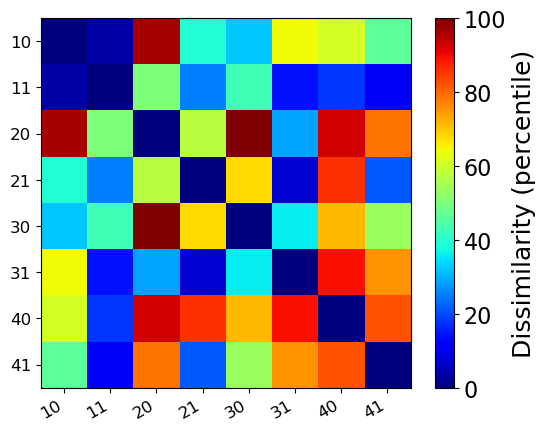

0

In [18]:
plot_rdm(fnirs_rdm, conditions= cons, percentile =True)


Computing RDM

RDM computing finished!
1


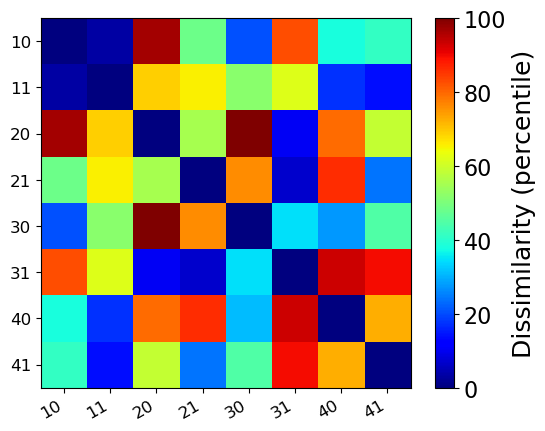

0

In [19]:
fnirs_rdm = eegRDM(fnirs_x, sub_opt=0, method='correlation')
plot_rdm(fnirs_rdm, conditions= cons, percentile =True)

In [20]:
#load the fmri data for brodmann atlas
import torch


import numpy as np
from sklearn.model_selection import train_test_split

#load the fmri data
fmri_data = torch.load("./Dataset/Data/dataset_hcpWM_brodmann.save")
fmri_data[0]

C:\Users\Alex\AppData\Local\Temp\ipykernel_40588\420376558.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fmri_data = torch.load("./Dataset/Data/dataset_hcpWM_brodmann.

{'roiTimeseries': array([[11350.08088302, 10155.62713398, 14362.48402943, ...,
          8532.74011791, 10060.62235426, 10060.62235426],
        [11344.43784024, 10123.17542102, 14332.20236078, ...,
          8520.45978568, 10055.06401944, 10055.06401944],
        [11359.51877184, 10098.26419157, 14315.70103445, ...,
          8518.19413514, 10072.50466188, 10072.50466188],
        ...,
        [11332.91384913, 10113.96160875, 14276.22833364, ...,
          8507.26184837, 10033.39975138, 10033.39975138],
        [11316.11557542, 10133.9973638 , 14296.90821211, ...,
          8516.5794364 , 10031.0481704 , 10031.0481704 ],
        [11317.91398157, 10135.21950373, 14307.02090305, ...,
          8510.86586978, 10041.63611737, 10041.63611737]]),
 'pheno': {'subjectId': '519950',
  'encoding': '1',
  'nback': '0',
  'condition': '3',
  'modality': 'fMRI'}}

In [21]:
#load the fmri data for brodmann atlas
import torch


import numpy as np
from sklearn.model_selection import train_test_split



#initialize the lists to store the data
x = []
y = []
subjectIds = []

#iterate over the data
for data in fmri_data:
   
    # get the label
    label = int(str(data["pheno"]["condition"])+ str(data["pheno"]["nback"]))
   
    if(data["roiTimeseries"].shape[0] != 35):
        data["roiTimeseries"] = np.pad(data["roiTimeseries"], ((0, 35 - data["roiTimeseries"].shape[0]), (0, 0)), mode='constant')
    x.append(data["roiTimeseries"].T)
    
    y.append(label)
    subjectIds.append(int(data["pheno"]["subjectId"][1]))


# make the data the proper shape [conditions, subjects, trials, channels, timepoints]
x = np.array(x)
y = np.array(y)
subjectIds = np.array(subjectIds)
# Define the number of conditions, subjects, trials, channels, and timepoints
n_conditions = len(np.unique(y))  # Number of unique conditions (e.g., 2 for binary)
n_subjects = len(np.unique(subjectIds))  # Number of subjects
n_trials = x.shape[0] // (n_conditions * n_subjects)  # Trials per condition per subject
n_channels = x.shape[1]  # Number of fNIRS channels
n_timepoints = x.shape[2]  # Number of time points

# Reshape x into the desired format: [conditions, subjects, trials, channels, timepoints]
brodmann_x = x.reshape((n_conditions, n_subjects, n_trials, n_channels, n_timepoints))

# Verify alignment of labels y
# Ensure y is shaped: [conditions, subjects, trials]
y_reshaped = y.reshape((n_conditions, n_subjects, n_trials))

# Subject IDs should match: [subjects]
subjectIds_reshaped = subjectIds[:n_subjects]

print("Reshaped x shape:", brodmann_x.shape)
print("Reshaped y shape:", y_reshaped.shape)
print("Reshaped subjectIds shape:", subjectIds_reshaped.shape)


from neurora.rdm_cal import eegRDM
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap
# Append the label as the first dimension of x

# Choose a metric: 'correlation', 'euclidean', etc.
fmri_rdm = eegRDM(brodmann_x, sub_opt=0)
fmri_rdm

Reshaped x shape: (8, 10, 217, 107, 35)
Reshaped y shape: (8, 10, 217)
Reshaped subjectIds shape: (10,)

Computing RDM

RDM computing finished!


array([[0.        , 0.00265674, 0.00265946, 0.00185996, 0.00254722,
        0.00209321, 0.00245928, 0.00285244],
       [0.00265674, 0.        , 0.00229712, 0.00216607, 0.00252127,
        0.00205473, 0.0017613 , 0.0024262 ],
       [0.00265946, 0.00229712, 0.        , 0.00175525, 0.00275952,
        0.00247808, 0.00257771, 0.00242897],
       [0.00185996, 0.00216607, 0.00175525, 0.        , 0.00216025,
        0.00202321, 0.00177374, 0.00214494],
       [0.00254722, 0.00252127, 0.00275952, 0.00216025, 0.        ,
        0.0016747 , 0.00218122, 0.00161246],
       [0.00209321, 0.00205473, 0.00247808, 0.00202321, 0.0016747 ,
        0.        , 0.00204668, 0.0018726 ],
       [0.00245928, 0.0017613 , 0.00257771, 0.00177374, 0.00218122,
        0.00204668, 0.        , 0.00289286],
       [0.00285244, 0.0024262 , 0.00242897, 0.00214494, 0.00161246,
        0.0018726 , 0.00289286, 0.        ]])

In [22]:
cons = [str(x) for x in np.unique(y)]
cons

['10', '11', '20', '21', '30', '31', '40', '41']

1


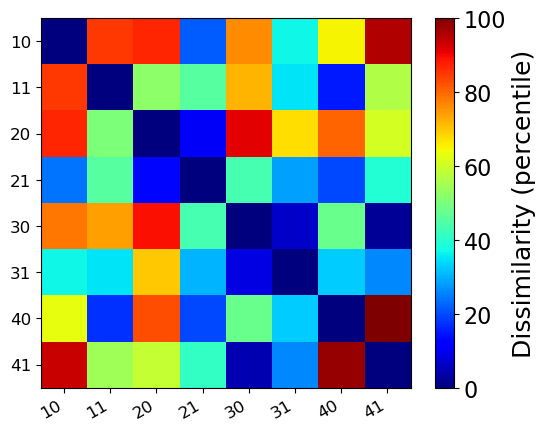

0

In [23]:
plot_rdm(fmri_rdm, conditions= cons, percentile =True)

In [24]:
from neurora.corr_cal_by_rdm import rdms_corr

# Calculate the correlation between two RDMs
rsa = rdms_corr(fnirs_rdm, fmri_rdm, rescale=True)


Computing the similarity

Computing finished!


In [25]:
rsa

array([0.05966065, 0.76297993])

In [26]:
#load the fmri data for brodmann atlas
import torch


import numpy as np
from sklearn.model_selection import train_test_split

#load the fmri data
aal_data = torch.load("./Dataset/Data/dataset_hcpWM_AAL.save")
aal_data[0]

C:\Users\Alex\AppData\Local\Temp\ipykernel_40588\3702879483.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  aal_data = torch.load("./Dataset/Data/dataset_hcpWM_AAL.save"

{'roiTimeseries': array([[11429.10773536, 13311.07914201, 11429.10773536, ...,
          7312.75756517,  8250.92570963,  8250.92570963],
        [11408.48225167, 13288.19188585, 11408.48225167, ...,
          7303.27517912,  8236.95861697,  8236.95861697],
        [11414.87524223, 13304.93586854, 11414.87524223, ...,
          7295.81154237,  8246.98349208,  8246.98349208],
        ...,
        [11438.14388178, 13330.72940023, 11438.14388178, ...,
          7279.43001333,  8216.50352466,  8216.50352466],
        [11433.17876389, 13322.0897582 , 11433.17876389, ...,
          7284.52634061,  8208.03302027,  8208.03302027],
        [11426.76084866, 13314.13169205, 11426.76084866, ...,
          7286.51887951,  8230.08365658,  8230.08365658]]),
 'pheno': {'subjectId': '519950',
  'encoding': '1',
  'nback': '0',
  'condition': '3',
  'modality': 'fMRI'}}

In [27]:
#load the fmri data for brodmann atlas
import torch


import numpy as np
from sklearn.model_selection import train_test_split



#initialize the lists to store the data
x = []
y = []
subjectIds = []

#iterate over the data
for data in aal_data:
   
    # get the label
    label = int(str(data["pheno"]["condition"])+ str(data["pheno"]["nback"]))
   
    if(data["roiTimeseries"].shape[0] != 35):
        data["roiTimeseries"] = np.pad(data["roiTimeseries"], ((0, 35 - data["roiTimeseries"].shape[0]), (0, 0)), mode='constant')
    x.append(data["roiTimeseries"].T)
    
    y.append(label)
    subjectIds.append(int(data["pheno"]["subjectId"][1]))


# make the data the proper shape [conditions, subjects, trials, channels, timepoints]
x = np.array(x)
y = np.array(y)
subjectIds = np.array(subjectIds)
# Define the number of conditions, subjects, trials, channels, and timepoints
n_conditions = len(np.unique(y))  # Number of unique conditions (e.g., 2 for binary)
n_subjects = len(np.unique(subjectIds))  # Number of subjects
n_trials = x.shape[0] // (n_conditions * n_subjects)  # Trials per condition per subject
n_channels = x.shape[1]  # Number of fNIRS channels
n_timepoints = x.shape[2]  # Number of time points

# Reshape x into the desired format: [conditions, subjects, trials, channels, timepoints]
aal_x = x.reshape((n_conditions, n_subjects, n_trials, n_channels, n_timepoints))

# Verify alignment of labels y
# Ensure y is shaped: [conditions, subjects, trials]
y_reshaped = y.reshape((n_conditions, n_subjects, n_trials))

# Subject IDs should match: [subjects]
subjectIds_reshaped = subjectIds[:n_subjects]

print("Reshaped x shape:", aal_x.shape)
print("Reshaped y shape:", y_reshaped.shape)
print("Reshaped subjectIds shape:", subjectIds_reshaped.shape)


from neurora.rdm_cal import eegRDM
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap
# Append the label as the first dimension of x

# Choose a metric: 'correlation', 'euclidean', etc.
aal_rdm = eegRDM(aal_x, sub_opt=0)
aal_rdm

KeyboardInterrupt: 

1


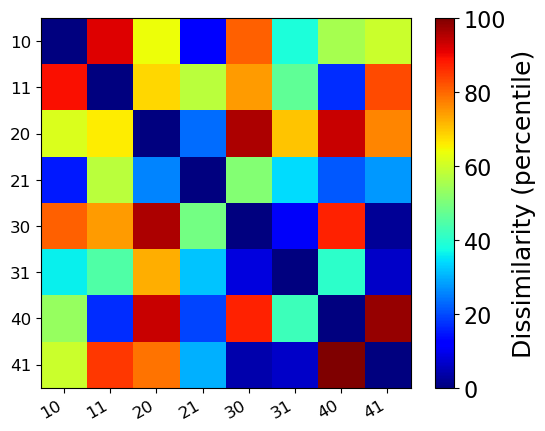

0

In [143]:
plot_rdm(aal_rdm, conditions= cons, percentile =True)

In [144]:
rsa = rdms_corr(fmri_rdm, aal_rdm, rescale=True)
rsa


Computing the similarity

Computing finished!


array([8.82868090e-01, 5.07608028e-10])

In [145]:
#load the fmri data for sphere atlas
import torch


import numpy as np
from sklearn.model_selection import train_test_split

#load the fmri data
sphere_data = torch.load("./Dataset/Data/dataset_hcpWM_sphere.save")
sphere_data[0]

C:\Users\Alex\AppData\Local\Temp\ipykernel_9692\2417838807.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sphere_data = torch.load("./Dataset/Data/dataset_hcpWM_sphere.

{'roiTimeseries': array([[10202.53313504, 11920.34218917, 12064.78385525, ...,
          6820.27637847,  9074.10548112,  9117.96809617],
        [10117.39270231, 11893.82586936, 12016.85943912, ...,
          6788.57939353,  9017.24455551,  9106.76061188],
        [10126.50164163, 11870.27602935, 12018.67571968, ...,
          6789.00482874,  9010.17992064,  9112.0288692 ],
        ...,
        [10152.10937175, 11823.89787035, 12032.49195378, ...,
          6785.19192737,  9026.82545976,  9126.0883359 ],
        [10116.23944718, 11825.24969199, 12001.7290974 , ...,
          6799.73146744,  9002.02464674,  9099.38718016],
        [10145.25153837, 11855.87970392, 12009.71514821, ...,
          6799.33751925,  9043.37555488,  9119.74381665]]),
 'pheno': {'subjectId': '519950',
  'encoding': '1',
  'nback': '0',
  'condition': '3',
  'modality': 'fMRI'}}

In [146]:

import torch


import numpy as np
from sklearn.model_selection import train_test_split



#initialize the lists to store the data
x = []
y = []
subjectIds = []

#iterate over the data
for data in sphere_data:
   
    # get the label
    label = int(str(data["pheno"]["condition"])+ str(data["pheno"]["nback"]))
   
    if(data["roiTimeseries"].shape[0] != 35):
        data["roiTimeseries"] = np.pad(data["roiTimeseries"], ((0, 35 - data["roiTimeseries"].shape[0]), (0, 0)), mode='constant')
    x.append(data["roiTimeseries"].T)
    
    y.append(label)
    subjectIds.append(int(data["pheno"]["subjectId"][1]))


# make the data the proper shape [conditions, subjects, trials, channels, timepoints]
x = np.array(x)
y = np.array(y)
subjectIds = np.array(subjectIds)
# Define the number of conditions, subjects, trials, channels, and timepoints
n_conditions = len(np.unique(y))  # Number of unique conditions (e.g., 2 for binary)
n_subjects = len(np.unique(subjectIds))  # Number of subjects
n_trials = x.shape[0] // (n_conditions * n_subjects)  # Trials per condition per subject
n_channels = x.shape[1]  # Number of fNIRS channels
n_timepoints = x.shape[2]  # Number of time points

# Reshape x into the desired format: [conditions, subjects, trials, channels, timepoints]
sphere_x = x.reshape((n_conditions, n_subjects, n_trials, n_channels, n_timepoints))

# Verify alignment of labels y
# Ensure y is shaped: [conditions, subjects, trials]
y_reshaped = y.reshape((n_conditions, n_subjects, n_trials))

# Subject IDs should match: [subjects]
subjectIds_reshaped = subjectIds[:n_subjects]

print("Reshaped x shape:", sphere_x.shape)
print("Reshaped y shape:", y_reshaped.shape)
print("Reshaped subjectIds shape:", subjectIds_reshaped.shape)


from neurora.rdm_cal import eegRDM
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap
# Append the label as the first dimension of x

# Choose a metric: 'correlation', 'euclidean', etc.
sphere_rdm = eegRDM(sphere_x, sub_opt=0)
sphere_rdm

Reshaped x shape: (8, 10, 217, 107, 35)
Reshaped y shape: (8, 10, 217)
Reshaped subjectIds shape: (10,)

Computing RDM

RDM computing finished!


array([[0.        , 0.00110579, 0.00107   , 0.00120998, 0.00125017,
        0.00089881, 0.0009588 , 0.00110324],
       [0.00110579, 0.        , 0.00104427, 0.0012782 , 0.00149671,
        0.00095643, 0.00103453, 0.00114381],
       [0.00107   , 0.00104427, 0.        , 0.00114795, 0.00125835,
        0.00111022, 0.00117521, 0.00111988],
       [0.00120998, 0.0012782 , 0.00114795, 0.        , 0.00122635,
        0.00121324, 0.00115249, 0.00110941],
       [0.00125017, 0.00149671, 0.00125835, 0.00122635, 0.        ,
        0.00122006, 0.00121792, 0.00093684],
       [0.00089881, 0.00095643, 0.00111022, 0.00121324, 0.00122006,
        0.        , 0.00106372, 0.00082531],
       [0.0009588 , 0.00103453, 0.00117521, 0.00115249, 0.00121792,
        0.00106372, 0.        , 0.00125332],
       [0.00110324, 0.00114381, 0.00111988, 0.00110941, 0.00093684,
        0.00082531, 0.00125332, 0.        ]])

In [147]:
rsa = rdms_corr(sphere_rdm, aal_rdm, rescale=True)
rsa


Computing the similarity

Computing finished!


array([0.42255063, 0.02508527])

In [148]:
rsa = rdms_corr(sphere_rdm, fnirs_rdm, rescale=True)
rsa


Computing the similarity

Computing finished!


array([-0.04926108,  0.80341355])

In [149]:
fnirs_rdms = eegRDM(fnirs_x, time_opt=1, time_win = 1, time_step = 1, sub_opt=0, method='correlation')
fnirs_rdms


Computing RDMs
Calculating: [====================================================================================================] 100.00%
RDM computing finished!


array([[[0.        , 1.14586234, 0.83465787, ..., 0.89323987,
         0.83183261, 0.81795065],
        [1.14586234, 0.        , 0.98550331, ..., 1.05479177,
         0.81390304, 1.0732213 ],
        [0.83465787, 0.98550331, 0.        , ..., 0.76096336,
         1.28756336, 0.92056099],
        ...,
        [0.89323987, 1.05479177, 0.76096336, ..., 0.        ,
         0.87392521, 0.65630197],
        [0.83183261, 0.81390304, 1.28756336, ..., 0.87392521,
         0.        , 1.1967933 ],
        [0.81795065, 1.0732213 , 0.92056099, ..., 0.65630197,
         1.1967933 , 0.        ]],

       [[0.        , 0.98167308, 0.791065  , ..., 0.94481308,
         0.93137335, 0.96947438],
        [0.98167308, 0.        , 0.7784141 , ..., 0.93327892,
         0.70426271, 0.99440437],
        [0.791065  , 0.7784141 , 0.        , ..., 0.7741033 ,
         1.30023052, 0.81824408],
        ...,
        [0.94481308, 0.93327892, 0.7741033 , ..., 0.        ,
         0.94117651, 0.65443651],
        [0.9

In [150]:
aal_rdms = eegRDM(aal_x, time_opt=1, time_win = 1, time_step = 1, sub_opt=0, method='correlation')


Computing RDMs
Calculating: [====================================================================================================] 100.00%
RDM computing finished!



Computing similarities

Computing finished!


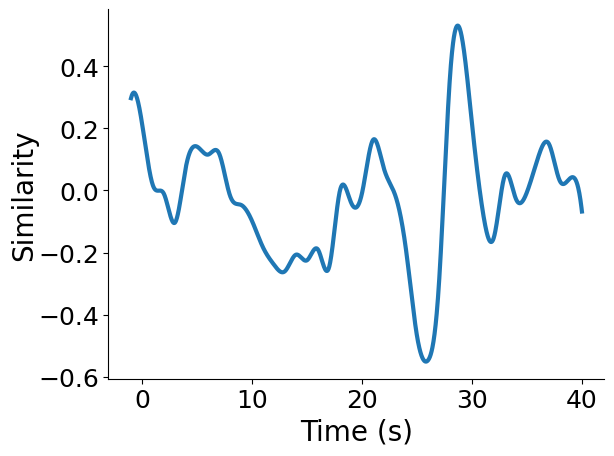

0

In [151]:
coors = rdms_corr(aal_rdm, fnirs_rdms)
corrs1 = np.reshape(coors, [1, 42, 2])
plot_corrs_by_time(corrs1, time_unit=[-1, 1])



In [30]:
#load the fmri data for brodmann atlas
import torch


import numpy as np
from sklearn.model_selection import train_test_split

#load the fmri data
motor_brodmann = torch.load("./Dataset/Data/hcp_motor_brodmann.save")
motor_brodmann[0]


C:\Users\Alex\AppData\Local\Temp\ipykernel_40588\2380471037.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  motor_brodmann = torch.load("./Dataset/Data/hcp_motor_brodman

{'roiTimeseries': array([[10714.91729263,  7018.9441933 ,  9828.85289207, ...,
          8721.71981866, 10383.94695562, 10383.94695562],
        [10738.85455019,  7033.8068916 ,  9862.27798511, ...,
          8717.06220004, 10406.01648175, 10406.01648175],
        [10720.04023589,  7014.88149066,  9824.1170482 , ...,
          8711.90215568, 10385.24200363, 10385.24200363],
        ...,
        [10733.83112642,  7042.9648729 ,  9899.72978902, ...,
          8758.20792794, 10466.19197548, 10466.19197548],
        [10761.11462933,  7039.65641751,  9895.16431985, ...,
          8760.47357152, 10474.57411904, 10474.57411904],
        [10735.35257278,  7032.31272619,  9886.58627773, ...,
          8774.11152013, 10467.77630119, 10467.77630119]]),
 'pheno': {'subjectId': '113619',
  'encoding': '0',
  'label': '2',
  'condition': None,
  'modality': 'fMRI'}}

In [39]:
subject_id_counts = {}
for data in motor_brodmann:
    subject_id = data["pheno"]["subjectId"]
    if subject_id in subject_id_counts:
        subject_id_counts[subject_id] += 1
    else:
        subject_id_counts[subject_id] = 1
unwanted_subjects = []
for key, value in subject_id_counts.items():
    if value ==  5:
        unwanted_subjects.append(key)

In [42]:
#load the fmri data for brodmann atlas
import torch


import numpy as np
from sklearn.model_selection import train_test_split



#initialize the lists to store the data
x = []
y = []
subjectIds = []

#iterate over the data
for data in motor_brodmann:
    if data["pheno"]["subjectId"] in unwanted_subjects:
        continue
    # get the label
    label = int(str(data["pheno"]["label"]))
    example = data["roiTimeseries"]
    if(data["roiTimeseries"].shape[0] != 17):
        example = np.pad(data["roiTimeseries"], ((0, 17 - data["roiTimeseries"].shape[0]), (0, 0)), mode='constant')
    x.append(example)
    
    y.append(label)
    subjectIds.append(int(data["pheno"]["subjectId"]))


# make the data the proper shape [conditions, subjects, trials, channels, timepoints]
x = np.array(x)
print(x.shape)
y = np.array(y)


# Define the number of conditions, subjects, trials, channels, and timepoints
n_conditions = len(np.unique(y))  # Number of unique conditions (e.g., 2 for binary)
n_subjects = len(np.unique(subjectIds))  # Number of subjects
print(n_subjects)
n_trials = x.shape[0] // (n_conditions * n_subjects)  # Trials per condition per subject
n_channels = x.shape[1]  # Number of fNIRS channels
n_timepoints = x.shape[2]  # Number of time points

# Reshape x into the desired format: [conditions, subjects, trials, channels, timepoints]
motor_b_x = x.reshape((n_conditions, n_subjects, n_trials, n_channels, n_timepoints))

# Verify alignment of labels y
# Ensure y is shaped: [conditions, subjects, trials]
y_reshaped = y.reshape((n_conditions, n_subjects, n_trials))

# Subject IDs should match: [subjects]
subjectIds_reshaped = np.array(subjectIds[:n_subjects])

print("Reshaped x shape:", motor_b_x.shape)
print("Reshaped y shape:", y_reshaped.shape)
print("Reshaped subjectIds shape:", subjectIds_reshaped.shape)


from neurora.rdm_cal import eegRDM
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap
# Append the label as the first dimension of x

# Choose a metric: 'correlation', 'euclidean', etc.
aal_rdm = eegRDM(motor_b_x, sub_opt=0)
aal_rdm

(10810, 17, 107)
1081
Reshaped x shape: (5, 1081, 2, 17, 107)
Reshaped y shape: (5, 1081, 2)
Reshaped subjectIds shape: (1081,)

Computing RDM

RDM computing finished!


array([[0.        , 0.14478895, 0.14358082, 0.14611083, 0.14471093],
       [0.14478895, 0.        , 0.14830273, 0.14645359, 0.14410386],
       [0.14358082, 0.14830273, 0.        , 0.14071768, 0.14051885],
       [0.14611083, 0.14645359, 0.14071768, 0.        , 0.14648677],
       [0.14471093, 0.14410386, 0.14051885, 0.14648677, 0.        ]])

1


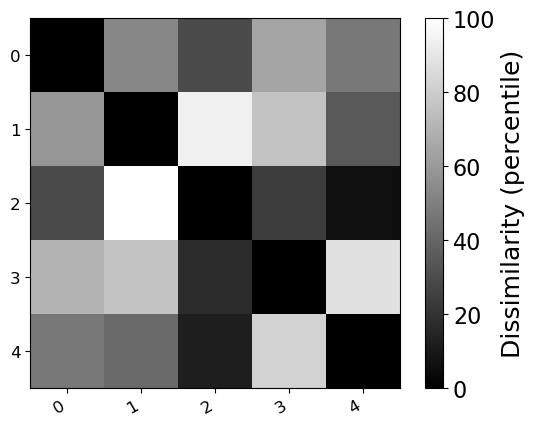

0

In [49]:
cons = [str(x) for x in np.unique(y)]
plot_rdm(aal_rdm, conditions = cons, percentile =True, cmap="gray")